In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("Signature.csv")

In [2]:
data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [3]:
#class imbalance

'''No of normal class seems to be around 9711 and anamoly class is 12833. This is not a very significant class imbalance problem'''
data['class'].value_counts()


anomaly    12833
normal      9711
Name: class, dtype: int64

C:\Users\jsgde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


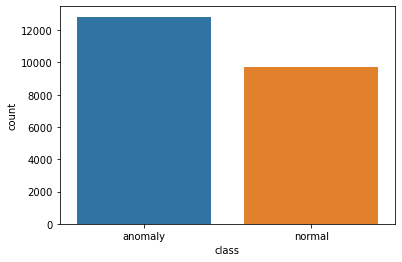

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(data['class'])
g.set_xticklabels(['anomaly','normal'])
plt.show()

In [5]:
#undersampling anamoly class
anamolyclass=data[data['class']=='anomaly']
normalclass=data[data['class']=='normal']
class_count_0, class_count_1 = data['class'].value_counts()
anamolyclassunder=anamolyclass.sample(class_count_1)

undersampled_data=pd.concat([anamolyclassunder, normalclass], axis=0)
undersampled_data['class'].value_counts()



anomaly    9711
normal     9711
Name: class, dtype: int64

<AxesSubplot:title={'center':'count after undersampling'}>

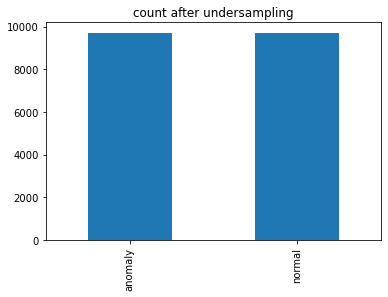

In [6]:
undersampled_data['class'].value_counts().plot(kind='bar',title='count after undersampling')

In [7]:
#oversampling normal class
normalclassover=normalclass.sample(class_count_0,replace=True)

oversampled_data=pd.concat([anamolyclass, normalclassover], axis=0)
oversampled_data['class'].value_counts()


anomaly    12833
normal     12833
Name: class, dtype: int64

<AxesSubplot:title={'center':'count after oversampling'}>

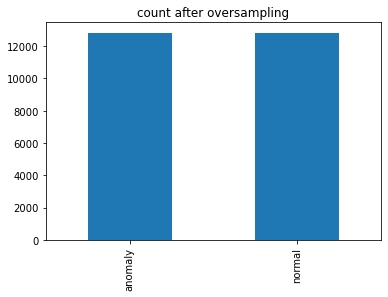

In [8]:
oversampled_data['class'].value_counts().plot(kind='bar',title='count after oversampling')

In [9]:
#data description

data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Data preprocessing
#idenftifying null values
data.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent                          0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                          18
srv_count                      13
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

In [11]:
data.fillna(0,inplace=True)
data.isnull().sum()
#null values replaced with 0

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [12]:
#check datatypes
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [13]:
categorical_features=[column_name for column_name in data.columns if data[column_name].dtype=='O']
numerical_features=[column_name for column_name in data.columns if data[column_name].dtype!='O']

In [14]:
for each_feature in categorical_features:
    unique_values=len(data[each_feature].unique())
    print("Cardinality(no.of. unique values) of {} are {}".format(each_feature,unique_values))

Cardinality(no.of. unique values) of protocol_type are 3
Cardinality(no.of. unique values) of service are 64
Cardinality(no.of. unique values) of flag are 11
Cardinality(no.of. unique values) of class are 2


In [15]:
data['class'].replace({'anomaly':1,'normal':0},inplace=True)

In [16]:
data['class'].head

<bound method NDFrame.head of 0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: class, Length: 22544, dtype: int64>

In [17]:
#encoding the data
from sklearn import preprocessing
# label_encoder object knows how to understand   word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Smoking'. 

data['protocol_type_enc']= label_encoder.fit_transform(data['protocol_type']) 
data['service_enc']= label_encoder.fit_transform(data['service']) 
data['flag_enc']= label_encoder.fit_transform(data['flag']) 
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type_enc,service_enc,flag_enc
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,1,1,45,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,1,1,45,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.0,0.0,0.00,0.00,0,1,19,9
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.0,0.0,0.00,0.00,1,0,13,9
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.0,0.0,0.83,0.71,1,1,55,2


In [18]:
#outlier identification and removal



In [19]:
#split into training and test set
X=data.drop(['class','protocol_type','service','flag'],axis=1)
y=data['class']
X.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_enc,service_enc,flag_enc
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,45,1
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,45,1
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1,19,9
3,0,20,0,0,0,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0,13,9
4,1,0,15,0,0,0,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,55,2


In [20]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [21]:
#split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#length of training and test data set
print("Length of Training Data:{}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data:18035
Length of Testing Data: 4509


In [22]:
#model building - Logistic regression

from sklearn.linear_model import LogisticRegression
classifier_logreg=LogisticRegression(solver='liblinear',random_state=0)
classifier_logreg.fit(X_train,y_train)

y_pred=classifier_logreg.predict(X_test)
print(y_pred)

#evaluating model score

from sklearn.metrics import accuracy_score
print("Accuracy Score:{}".format(accuracy_score(y_test,y_pred))
)

[0 1 0 ... 1 1 0]
Accuracy Score:0.8312264360168552


In [25]:
#kfoldcross-validation
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(classifier_logreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.82390774 0.83433134 0.84652916 0.83876691 0.83895297]
Average Cross Validation score :0.8364976248823461
